In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob

C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Test/Varicella\10_v.jpg


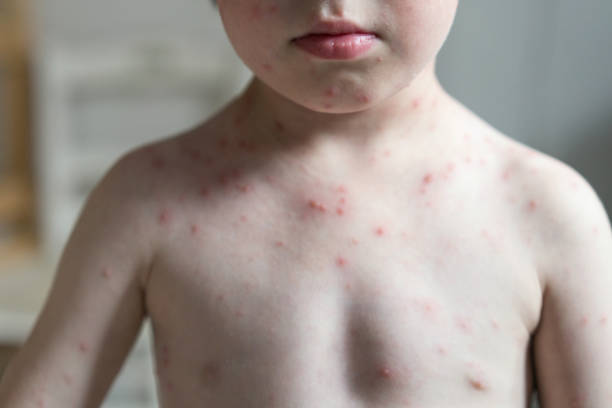

In [38]:

acne = list(glob('C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Test/Varicella/*'))
print(acne[0])
PIL.Image.open(str(acne[0]))


In [39]:
data_dir="C:/Users/admin/Desktop/MyDC/First Semester/AIDI1003-Capstone/Final-Project/Dataset/Train"

In [40]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2941 files belonging to 3 classes.
Using 2353 files for training.


In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2941 files belonging to 3 classes.
Using 588 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['Acne', 'Normal', 'Varicella']


In [51]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        make_serializable(layer)

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [52]:
resnet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 3)                1539      
 pper)                                                           
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
__________________________________

In [53]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
 

Epoch 1/10
74/74 [==============================] - 238s 3s/step - loss: 0.4206 - accuracy: 0.8874 - val_loss: 0.0723 - val_accuracy: 0.9762
Epoch 2/10
74/74 [==============================] - 232s 3s/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0593 - val_accuracy: 0.9779
Epoch 3/10
74/74 [==============================] - 270s 4s/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0389 - val_accuracy: 0.9898
Epoch 4/10
74/74 [==============================] - 247s 3s/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0334 - val_accuracy: 0.9915
Epoch 5/10
74/74 [==============================] - 232s 3s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9881
Epoch 6/10
74/74 [==============================] - 243s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9932
Epoch 7/10
74/74 [==============================] - 238s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9881
Epoch 8/10
74

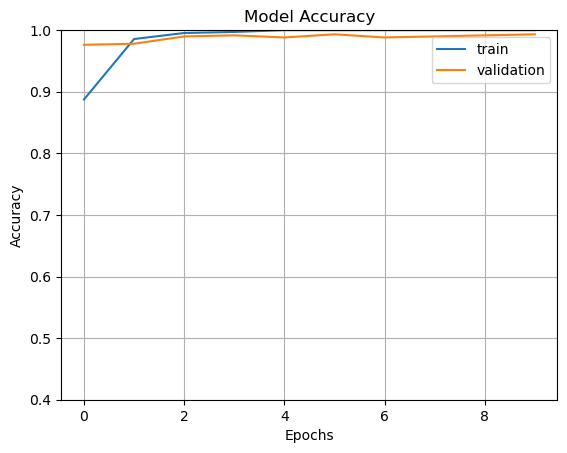

In [55]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

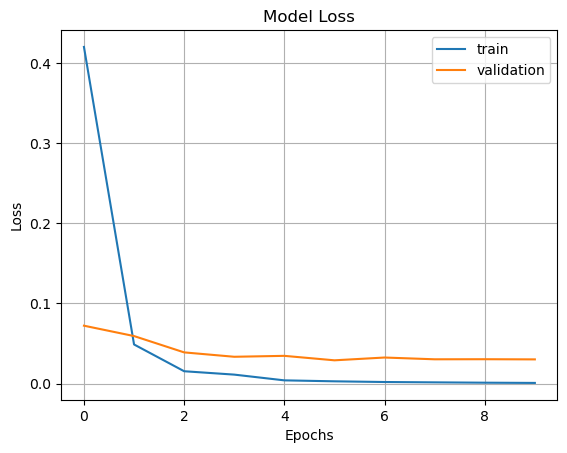

In [56]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [61]:
resnet_model.save_weights('resnet50_weights.h5')

In [73]:
resnet_model.load_weights('resnet50_weights.h5')

In [74]:
import cv2
image=cv2.imread(str(acne[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [75]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 150ms/step
[[8.2517574e-03 2.0506717e-05 9.9172771e-01]]


In [76]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Varicella
